# Temporal Patterns and Sesonality

# IMPORTANT CORONA STARTS IN SPRING 2020

**Temporal Patterns and Seasonality**: Demonstrate how the number of charging events varies during
the day, the week, and between seasons. What patterns can you observe and how do you explain
them?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
import numpy as np

In [3]:
df_charging = pd.read_pickle("data/charging_modified.pkl")
# df_charging = pd.read_csv('data/charging_modified.csv')
# Initialize a Dataframe for Exploration
df_exploration = df_charging.set_index('connectionTime')
df_exploration_dis = df_charging.set_index('disconnectTime')

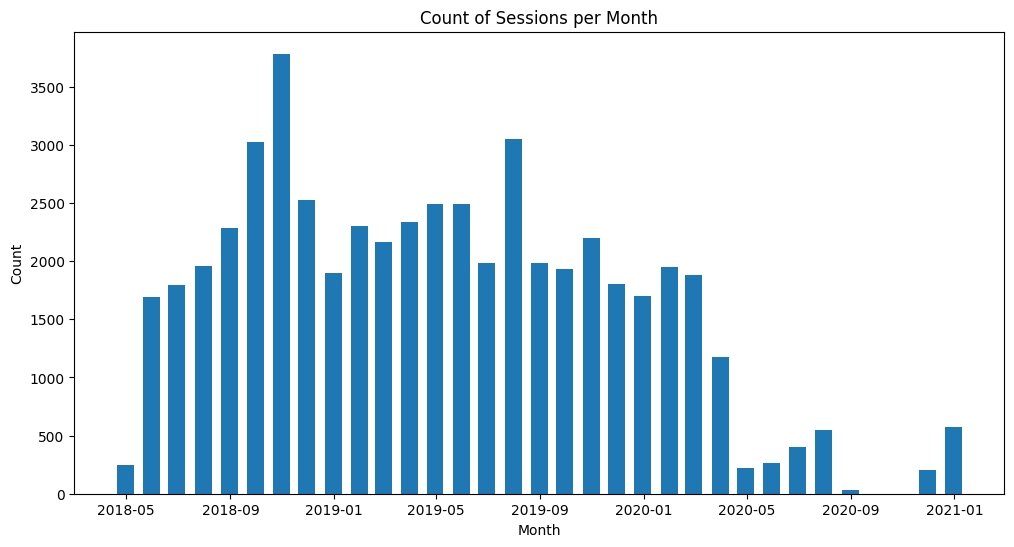

In [4]:
monthly_counts = df_exploration.resample('M').count()
# Plotting
plt.figure(figsize=(12, 6))
plt.bar(monthly_counts.index, monthly_counts['id'], width=20, align='center')
plt.title('Count of Sessions per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

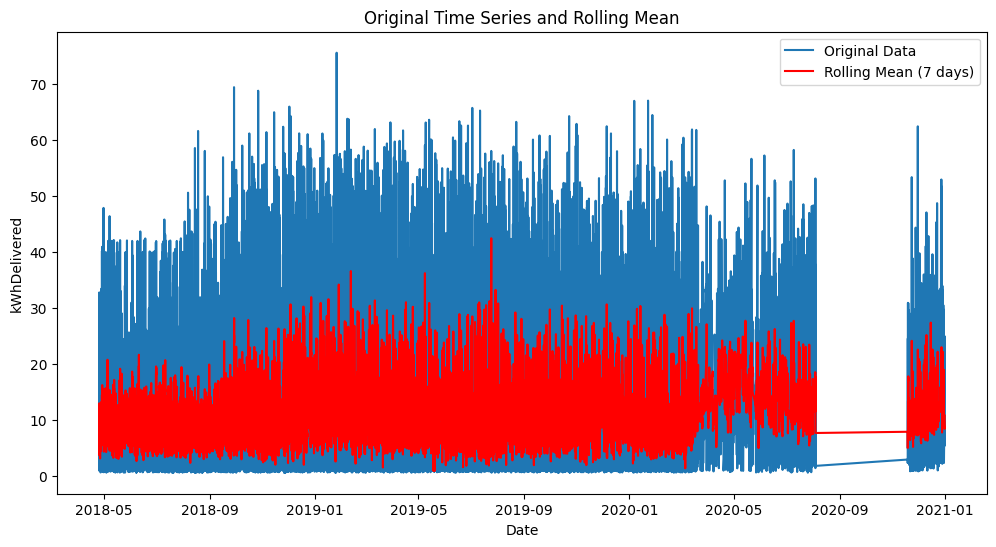

In [5]:
# Calculate rolling mean for a specified window (e.g., 7 days)
rolling_mean = df_exploration['kWhDelivered'].rolling(window=7).mean()

# Plot the original time series and the rolling mean
plt.figure(figsize=(12, 6))
plt.plot(df_exploration['kWhDelivered'], label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean (7 days)', color='red')
plt.title('Original Time Series and Rolling Mean')
plt.xlabel('Date')
plt.ylabel('kWhDelivered')
plt.legend()
plt.show()

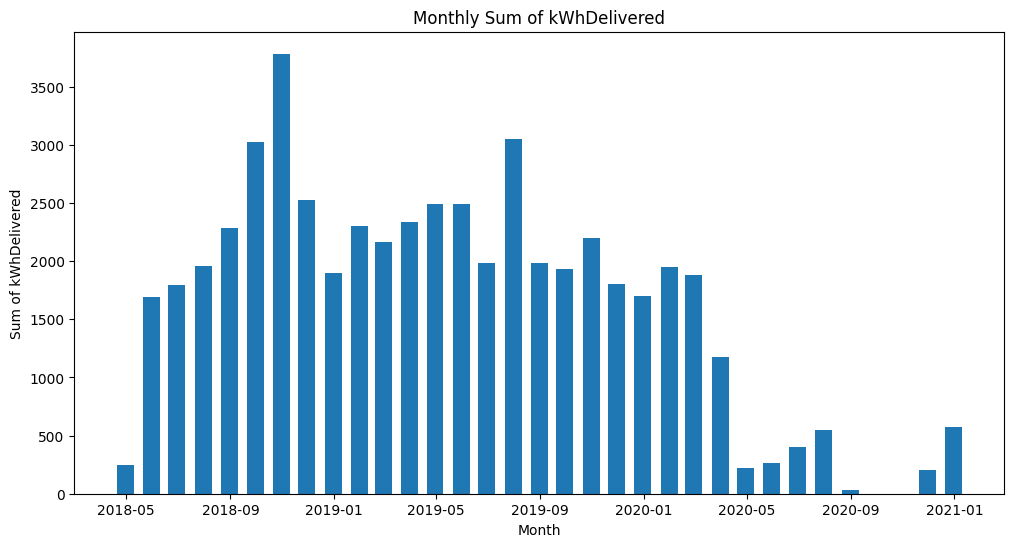

In [6]:
exploration_monthly = df_exploration['kWhDelivered'].resample('M').sum()

# Plot the monthly sum
plt.figure(figsize=(12, 6))
# exploration_monthly.plot(kind='bar')
plt.bar(exploration_monthly.index, monthly_counts['id'], width=20, align='center')
plt.title('Monthly Sum of kWhDelivered')
plt.xlabel('Month')
plt.ylabel('Sum of kWhDelivered')
plt.show()

### Daily Charging Patterns:
#### Hourly Distribution:
Create a bar plot to showcase the distribution of charging events throughout the day, highlighting peak hours.
Analyze if there are specific times during the day when charging sessions are more prevalent.

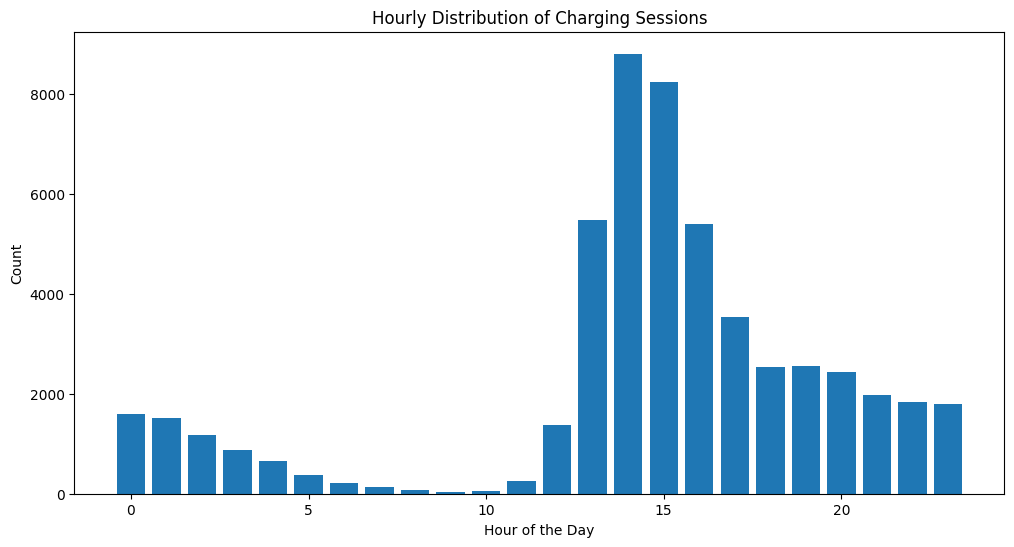

In [7]:
hourly_counts = df_exploration.groupby(df_exploration.index.hour).size()
plt.figure(figsize=(12, 6))
plt.bar(hourly_counts.index, hourly_counts)
plt.title('Hourly Distribution of Charging Sessions')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

### Weekly Charging Patterns:
#### Day of the Week Comparison:
Compare the average number of charging events on each day of the week.
Explore if there are specific weekdays with higher or lower charging activity.

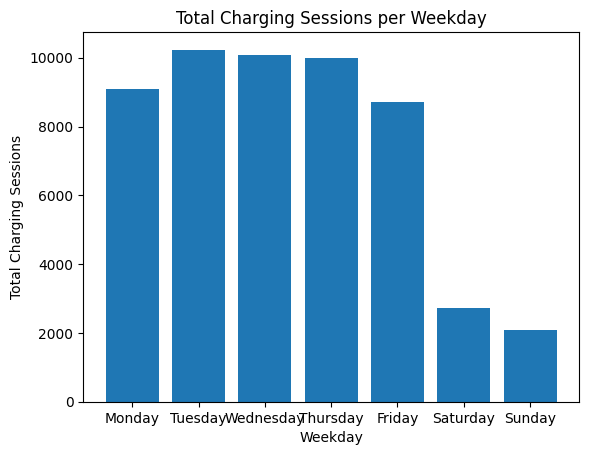

In [8]:
weekday_order = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]
weekday_counts = df_exploration['weekday'].value_counts().loc[weekday_order]
plt.bar(weekday_counts.index, weekday_counts)
plt.xlabel('Weekday')
plt.ylabel('Total Charging Sessions')
plt.title('Total Charging Sessions per Weekday')
plt.show()


### Seasonal Charging Patterns:
#### Seasonal Trends:
Explore the charging patterns across different seasons (e.g., winter, spring, summer, fall).
Investigate if there are notable variations in charging behavior based on the season.

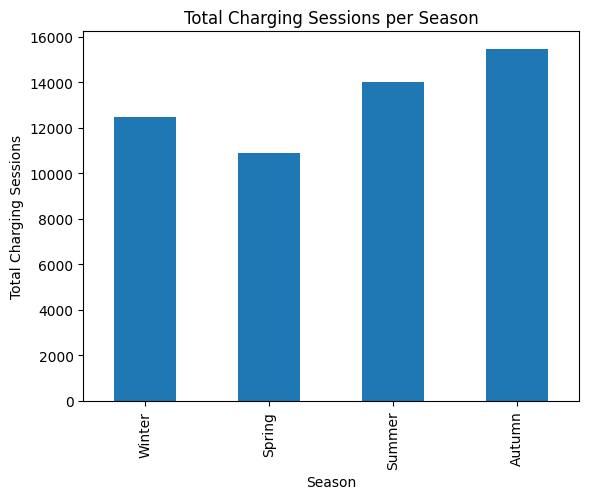

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Angenommen df_exploration hat einen Datetime-Index

# Definition der Jahreszeiten basierend auf den Monaten
seasons = {
    'Winter': [12, 1, 2],    # Dezember, Januar, Februar
    'Spring': [3, 4, 5],   # März, April, Mai
    'Summer': [6, 7, 8],     # Juni, Juli, August
    'Autumn': [9, 10, 11]    # September, Oktober, November
}

# Funktion zum Zuordnen der Jahreszeiten basierend auf dem Monat
def get_season(month):
    for season, months in seasons.items():
        if month in months:
            return season

# Gruppieren nach Monat und Berechnung der Größe jeder Gruppe
monthly_counts = df_exploration.groupby(df_exploration.index.month).size()

# Verknüpfen der Monate mit den Jahreszeiten
seasonal_counts = monthly_counts.groupby(get_season).sum()

desired_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_counts = seasonal_counts.reindex(desired_order)

# Erstellen des Balkendiagramms
seasonal_counts.plot(kind='bar')

# Beschriftung der Achsen und Titel
plt.xlabel('Season')
plt.ylabel('Total Charging Sessions')
plt.title('Total Charging Sessions per Season')

plt.show()


## Advanced Analyses:

#### Heatmaps for Hourly and Weekly Patterns:
Create heatmaps to showcase hourly and weekly charging patterns, providing a comprehensive view of the data.

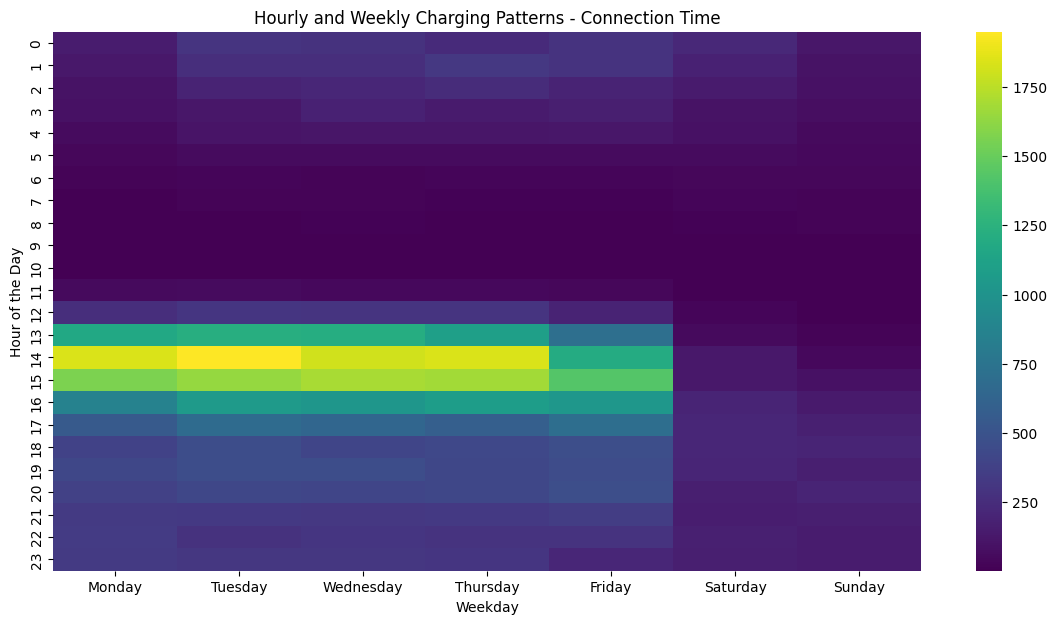

In [10]:
# Assuming df_exploration is your DataFrame with a datetime index
# If not, you may need to convert your index to datetime first
df_exploration.index = pd.to_datetime(df_exploration.index)

# Group by hour and weekday
hourly_weekly_counts = df_exploration.groupby([df_exploration.index.hour, df_exploration.index.day_name()]).size().unstack()

# Order the columns by weekday starting from Monday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_weekly_counts = hourly_weekly_counts[weekday_order]

# Plot the heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(hourly_weekly_counts, cmap='viridis')
plt.title('Hourly and Weekly Charging Patterns - Connection Time')
plt.xlabel('Weekday')
plt.ylabel('Hour of the Day')
plt.show()


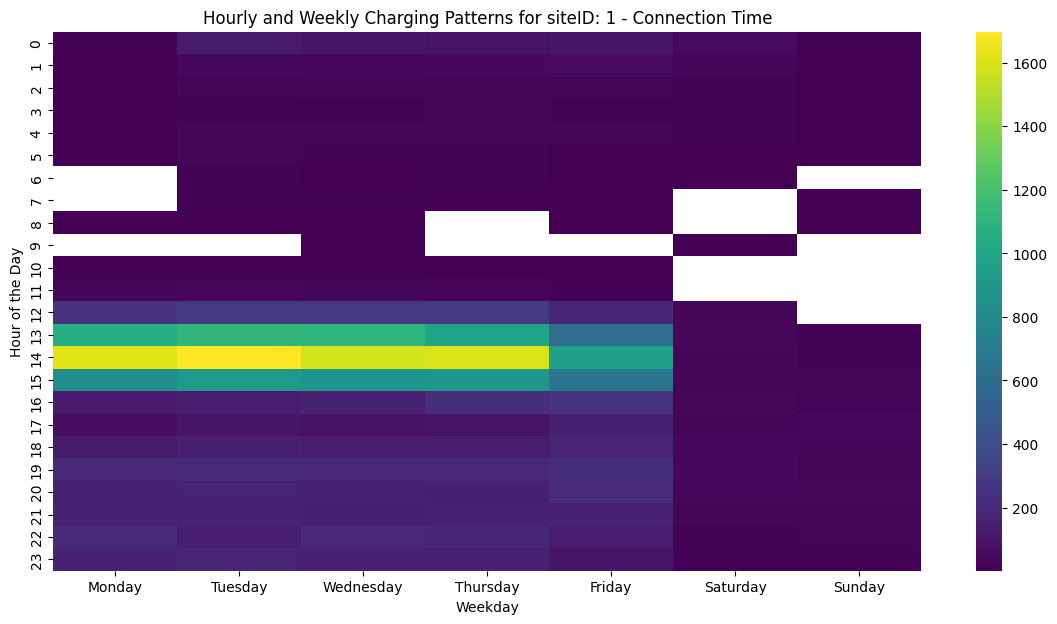

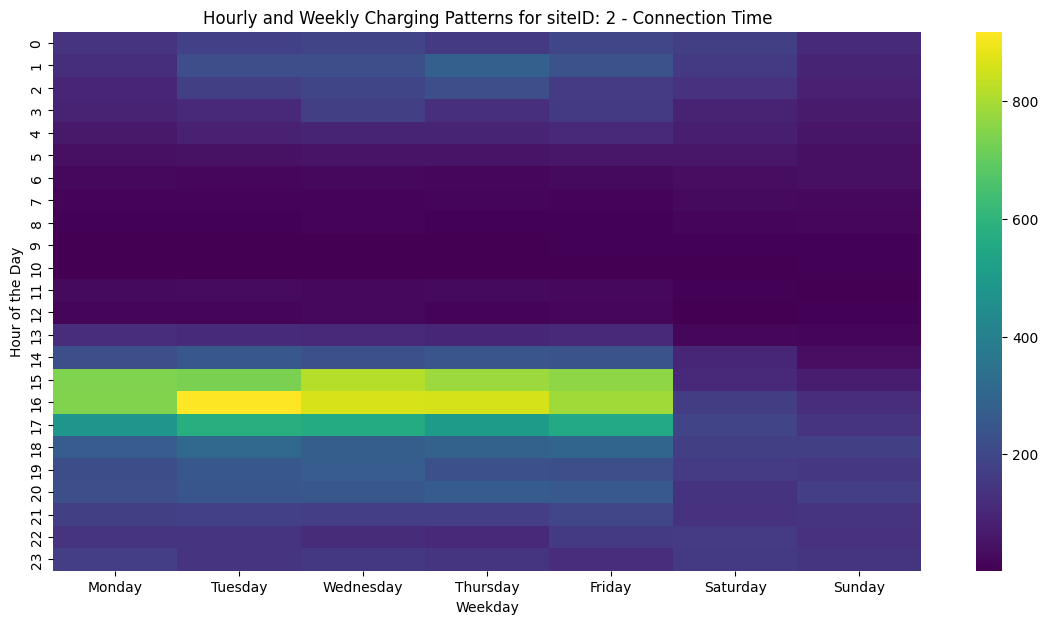

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_exploration is your DataFrame with a datetime index
# If not, you may need to convert your index to datetime first
df_exploration.index = pd.to_datetime(df_exploration.index)

# Group by siteID
grouped_by_site = df_exploration.groupby('siteID')

# Iterate over each siteID
for siteID, group_data in grouped_by_site:
    # Group by hour and weekday
    hourly_weekly_counts = group_data.groupby([group_data.index.hour, group_data.index.day_name()]).size().unstack()

    # Order the columns by weekday starting from Monday
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    hourly_weekly_counts = hourly_weekly_counts[weekday_order]

    # Plot the heatmap
    plt.figure(figsize=(14, 7))
    sns.heatmap(hourly_weekly_counts, cmap='viridis')
    plt.title(f'Hourly and Weekly Charging Patterns for siteID: {siteID} - Connection Time')
    plt.xlabel('Weekday')
    plt.ylabel('Hour of the Day')
    plt.show()


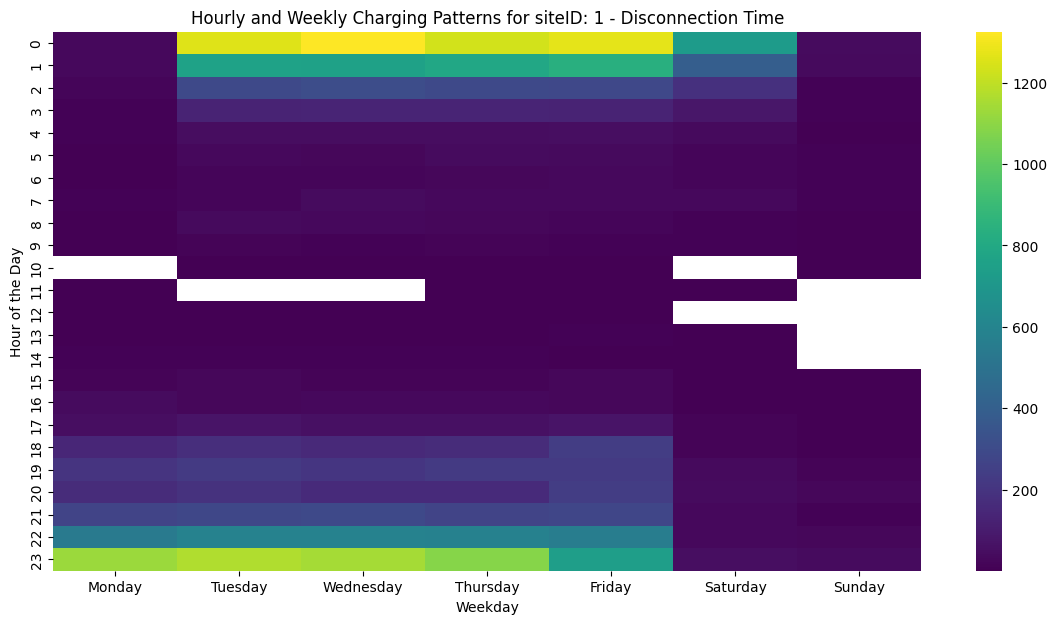

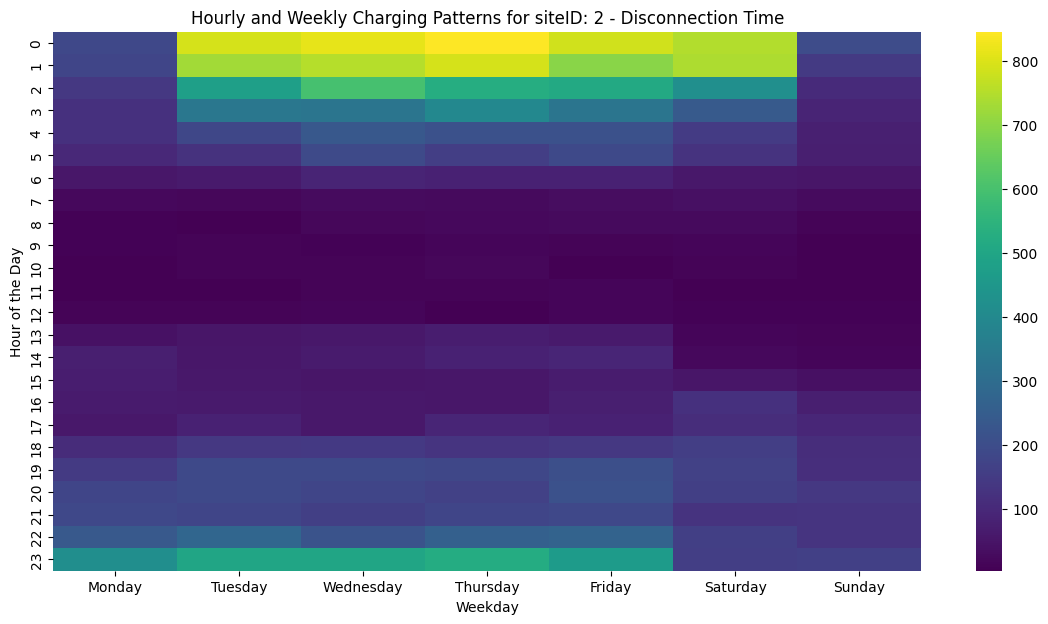

In [12]:
# If not, you may need to convert your index to datetime first
df_exploration_dis.index = pd.to_datetime(df_exploration_dis.index)

# Group by siteID
grouped_by_site = df_exploration_dis.groupby('siteID')

# Iterate over each siteID
for siteID, group_data in grouped_by_site:
    # Group by hour and weekday
    hourly_weekly_counts = group_data.groupby([group_data.index.hour, group_data.index.day_name()]).size().unstack()

    # Order the columns by weekday starting from Monday
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    hourly_weekly_counts = hourly_weekly_counts[weekday_order]

    # Plot the heatmap
    plt.figure(figsize=(14, 7))
    sns.heatmap(hourly_weekly_counts, cmap='viridis')
    plt.title(f'Hourly and Weekly Charging Patterns for siteID: {siteID} - Disconnection Time')
    plt.xlabel('Weekday')
    plt.ylabel('Hour of the Day')
    plt.show()


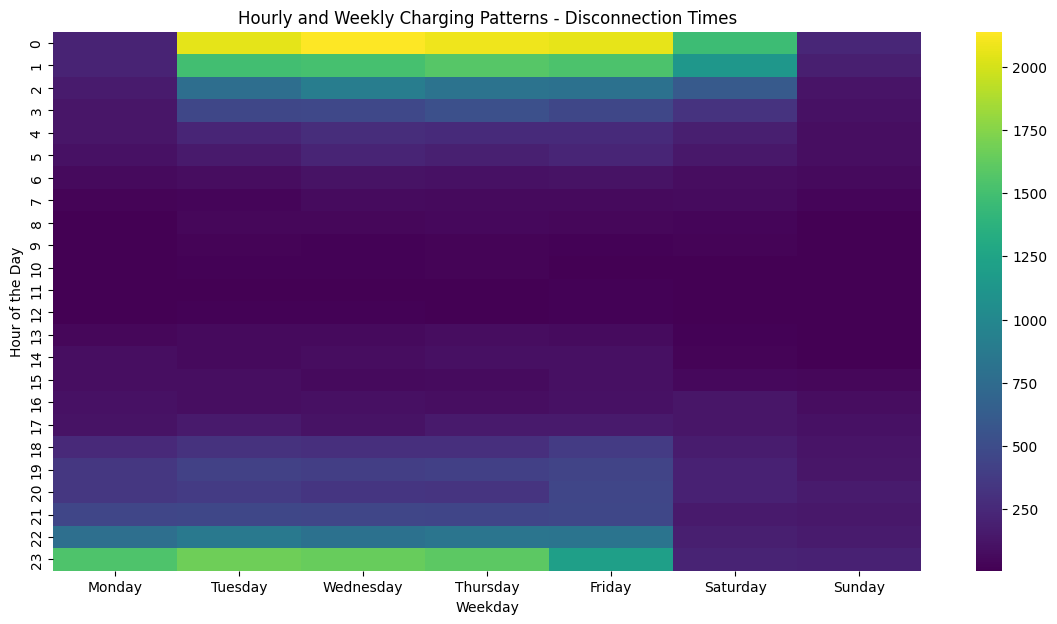

In [13]:
# Assuming df_exploration is your DataFrame with a datetime index
# If not, you may need to convert your index to datetime first
df_exploration_dis.index = pd.to_datetime(df_exploration_dis.index)

# Group by hour and weekday
hourly_weekly_counts = df_exploration_dis.groupby([df_exploration_dis.index.hour, df_exploration_dis.index.day_name()]).size().unstack()

# Order the columns by weekday starting from Monday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_weekly_counts = hourly_weekly_counts[weekday_order]

# Plot the heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(hourly_weekly_counts, cmap='viridis')
plt.title('Hourly and Weekly Charging Patterns - Disconnection Times')
plt.xlabel('Weekday')
plt.ylabel('Hour of the Day')
plt.show()